In [1]:
import pandas as pd
import numpy as np

In [2]:
mushrooms_df = pd.read_csv('agaricus-lepiota.data', header = None)
mushrooms_df.columns = ['Classes','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
                       'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                       'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
                       'spore-print-color','population','habitat']
mushrooms_df.head()

,Classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushrooms_df.replace({'?':None}, inplace = True)

In [4]:
print(mushrooms_df.isna().sum())
print(mushrooms_df.dtypes)
print(mushrooms_df.shape)

Classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
Classes                     object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment   

In [5]:
mushrooms_df.dropna(inplace = True)

[array(['e', 'p'], dtype=object)]
0.9927659574468086


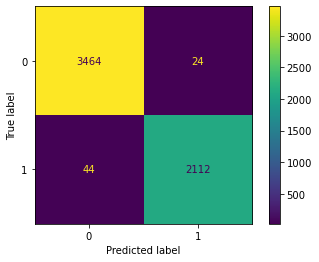

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

"""
Question 1
Fitting the Logistic regression
First I transform both features and classes
Then I split into K folds
Finally we train and score each fold and display the results
This model averages 0.9 for R2 score
However it incorrectly labels 44 truely poisonous mushrooms
"""
X = mushrooms_df.drop('Classes', axis = 1)
y = mushrooms_df['Classes'].to_numpy()

enc = OneHotEncoder()
enc_y = OrdinalEncoder()
X = enc.fit_transform(X)

enc_y.fit(y.reshape(-1, 1))
y = enc_y.transform(y.reshape(-1, 1))

kf = KFold(n_splits = 10)
f1 = []
cf_matrix = [[0,0],[0,0]]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    log_reg = LogisticRegression().fit(X_train, np.concatenate(y_train, axis=0))
    
    pred = log_reg.predict(X_test)
    f1.append(f1_score(y_test,pred))
    cf_matrix += confusion_matrix(y_test,pred)
    
print(enc_y.categories_)
print(np.mean(f1))
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

0.54
0.0
0.0
0.1724137931034483
0.7659574468085107
0.9207547169811321
0.9156626506024096
0.9938144329896906
0.9906015037593985
0.9162995594713657
[array(['e', 'p'], dtype=object)]
0.6215504103715955


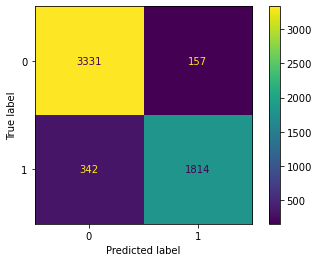

In [7]:
from sklearn.naive_bayes import BernoulliNB

"""
We can also fit the BernoulliNB classifier and run the same classification
However, this time our R2 is much lower
We can see by printing the R2 from each fold that some folds perform very poorly
So for this example Logistic Regression is a better classifier
"""
X = mushrooms_df.drop('Classes', axis = 1)
enc = OrdinalEncoder()
X = enc.fit_transform(X)

kf = KFold(n_splits = 10)
f1 = []
cf_matrix = [[0,0],[0,0]]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    log_reg = BernoulliNB().fit(X_train, np.concatenate(y_train, axis=0))
    
    pred = log_reg.predict(X_test)
    print(f1_score(y_test,pred))
    f1.append(f1_score(y_test,pred))
    cf_matrix += confusion_matrix(y_test,pred)
    
print(enc_y.categories_)
print(np.mean(f1))
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

In [8]:
# Example exercise from CH 6
>>> def gender_features(word):
...     return {'last_letter': word[-1]}
>>> gender_features('Shrek')

{'last_letter': 'k'}

In [9]:
>>> import nltk
# >>> nltk.download('names')
>>> from nltk.corpus import names
>>> labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
... [(name, 'female') for name in names.words('female.txt')])
>>> import random
>>> random.shuffle(labeled_names)

In [10]:
>>> featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
>>> train_set, test_set = featuresets[500:], featuresets[:500]
>>> classifier = nltk.NaiveBayesClassifier.train(train_set)

In [11]:
>>> classifier.classify(gender_features('Trinity'))

'female'

In [12]:
>>> print(nltk.classify.accuracy(classifier, test_set))

0.766


In [13]:
>>> classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     37.2 : 1.0
             last_letter = 'k'              male : female =     31.6 : 1.0
             last_letter = 'f'              male : female =     16.5 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0


In [14]:
#Now lets make our own with 4 features
def gender_features_4(word):
    return {'last_letter': word[-1],'last_2_letters': word[-2:],'first_letter': word[0], 'first_2_letters': word[:2]}
gender_features_4('Shrek')

{'last_letter': 'k',
 'last_2_letters': 'ek',
 'first_letter': 'S',
 'first_2_letters': 'Sh'}

In [15]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

featuresets = [(gender_features_4(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [16]:
print(nltk.classify.accuracy(classifier, test_set))

0.812


In [17]:
classifier.show_most_informative_features(10)

Most Informative Features
          last_2_letters = 'na'           female : male   =    163.3 : 1.0
          last_2_letters = 'la'           female : male   =     74.6 : 1.0
          last_2_letters = 'ia'           female : male   =     40.0 : 1.0
          last_2_letters = 'sa'           female : male   =     36.4 : 1.0
             last_letter = 'a'            female : male   =     34.3 : 1.0
             last_letter = 'k'              male : female =     31.5 : 1.0
          last_2_letters = 'us'             male : female =     30.4 : 1.0
          last_2_letters = 'ra'           female : male   =     26.5 : 1.0
          last_2_letters = 'do'             male : female =     26.3 : 1.0
          last_2_letters = 'ta'           female : male   =     25.3 : 1.0


By adding last_2_letters, first_letter, and first_2_letters, we were able to raise the accuracy of our model

Looking at the most informative features, we see some of the last_2_letter features returned very high odds ratios

In [18]:
# Now we can test the accuracy on the students in the class
student_names = [('Alex','male'),('Asare','male'),('Ashley','female'),('Ben','male'),('Brian','male'),('Isha','female'),('Issy','female'),
('Kyle','male'),('Madhavi', 'female'),('Matthew','male'),('Neel','male'),('Patrick', 'male'), 
 ('Sanskriti','female'),('Tianye','male')]

student_features = [(gender_features_4(n), gender) for (n, gender) in student_names]

print(nltk.classify.accuracy(classifier, student_features))

0.7857142857142857


0.6486486486486488


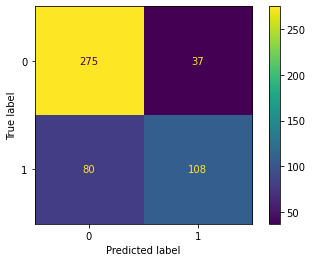

In [19]:
# First we format for logisitic regression
features = map(lambda x: x[0], featuresets)
features_list = [x for x in features]
features_list = [list(idx.values()) for idx in features_list] 

classes = map(lambda x: x[1], featuresets)
classes_list = np.array([x for x in classes])

features_list, classes_list = features_list[:1000], classes_list[:1000]

# Then lets encode the features and classes
enc = OneHotEncoder()
enc_y = OrdinalEncoder()
X = enc.fit_transform(features_list)

enc_y.fit(classes_list.reshape(-1, 1))
y = enc_y.transform(classes_list.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

log_reg = LogisticRegression().fit(X_train, np.concatenate(y_train, axis=0))

pred = log_reg.predict(X_test)
print(f1_score(y_test,pred))

cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()

The logistic regression model performs much worse than the Niave bayes classifier from before

In [20]:
"""
Question 3: Diabetes dataset
"""
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print(diabetes_df.isna().sum())
print(diabetes_df.dtypes)
print(diabetes_df.shape)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
(768, 9)


In [22]:
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis = 1)
y = np.array(diabetes_df['Outcome'])

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_test = X[-200:]
y_test = y[-200:]

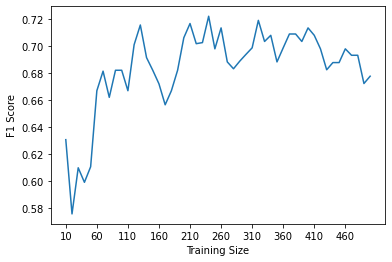

In [23]:
import matplotlib.pyplot as plt
trainings_sizes = np.arange(10,501,10)

accuracy_scores = []

for training_size in trainings_sizes:
    X_train = X[:training_size]
    y_train = y[:training_size]
    
    log_reg = LogisticRegression().fit(X_train, y_train)
    
    pred = log_reg.predict(X_test)
    accuracy_scores.append(f1_score(y_test,pred))
    
plt.plot(accuracy_scores)
plt.xticks(np.arange(0,50,5),labels = trainings_sizes[0::5])
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.show()

We see from the plot above that the classifier starts to perform better around training size of 60.

However, the accuracy never jumps above 0.72 therefore logistic regression is not a strong fit.

It is also important to note that the model peaks at a training size of around 240

In [24]:
# Question 4
from os import listdir
li = []
year = 1880

for file in listdir('names'):
    df = pd.read_csv(f'names/{file}', header = None)
    df['birth_year'] = year
    year += 1
    li.append(df)

baby_names_df = pd.concat(li)
baby_names_df.columns = ['name','class','weight','birth_year']
baby_names_df.head()

,name,class,weight,birth_year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [25]:
print(baby_names_df.isna().sum())
print(baby_names_df.dtypes)
print(baby_names_df.shape)

name          0
class         0
weight        0
birth_year    0
dtype: int64
name          object
class         object
weight         int64
birth_year     int64
dtype: object
(2020863, 4)


In [26]:
baby_names_df.describe()

,weight,birth_year
count,2.020863e+06,2.020863e+06
mean,1.773899e+02,1.976946e+03
std,1.502471e+03,3.451037e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.954000e+03
50%,1.200000e+01,1.987000e+03
75%,3.200000e+01,2.005000e+03
max,9.969300e+04,2.020000e+03


<AxesSubplot:>

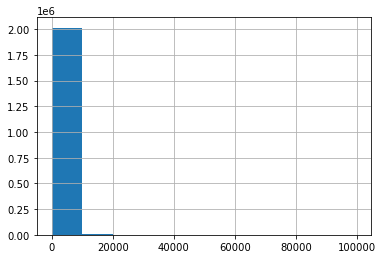

In [27]:
baby_names_df['weight'].hist()

In [28]:
baby_names_df['class'].replace({'F':1,'M':0}, inplace = True)

In [29]:
# Create naive Bayes From scratch
def create_probability(df, feature, value, Y, label,alpha):
    df = df.loc[df[Y] == label]
    df_x = df.loc[df[feature] == value]
    
    p_x_given_y = (sum(df_x['weight'])+alpha)/(sum(df['weight'])+alpha)
    return(p_x_given_y)

def class_probabilities(df,Y):
    classes = [0,1]
    probs = []
    for i in classes:
        df_class = df.loc[df[Y]==i]
        probs.append(sum(df_class['weight'])/sum(df['weight']))
    return(probs)

def naive_bayes_classifier(df,test,Y,alpha):
    features = ['name','birth_year']
    classes = [0,1]
    
    probs = class_probabilities(df,Y)
    
    preds = []
    
    for index, row in test.iterrows():
        likelihood = [1,1]
        for ix,class_ in enumerate(classes):
            for feature in features:
                likelihood[ix] *= create_probability(df,feature,row[feature],Y,class_,alpha)
                
        post_prob = [1,1]
        for ix,class_ in enumerate(classes):
            post_prob[ix] = likelihood[ix]*probs[ix]
            
        preds.append(np.argmax(post_prob))
        
    return(preds)

In [30]:
# Now lets try with the students
students_df = pd.DataFrame(student_names)
students_df['birth_year'] = 1985
students_df.columns = ['name','class','birth_year']
students_df['class'].replace({'female':1,'male':0}, inplace = True)

In [31]:
from sklearn.metrics import f1_score
students_x = students_df[['name','birth_year']]
students_y = students_df['class']
y_pred = naive_bayes_classifier(baby_names_df,students_x,'class',100)
print(confusion_matrix(students_y,y_pred))
print(f1_score(students_y,y_pred))

[[9 0]
 [1 4]]
0.888888888888889


In [32]:
# Finally lets try with the test case
test_case = [["Dylan",2001],['Madison',1992],['Tyler',2015],['Dana',2015]]
test_case_df = pd.DataFrame(test_case)
test_case_df.columns = ['name','birth_year']

y_pred = naive_bayes_classifier(baby_names_df,test_case_df,'class',100)
print(y_pred)


[0, 1, 0, 1]


The model works fairly well for both test cases, missing only one classification between the two tests

In [33]:
# Question 5
>>> from sklearn import datasets
>>> iris_X, iris_y = datasets.load_iris(return_X_y=True)
>>> np.unique(iris_y)

array([0, 1, 2])

In [34]:
>>> np.random.seed(0)
>>> indices = np.random.permutation(len(iris_X))
>>> iris_X_train = iris_X[indices[:-10]]
>>> iris_y_train = iris_y[indices[:-10]]
>>> iris_X_test = iris_X[indices[-10:]]
>>> iris_y_test = iris_y[indices[-10:]]
>>> # Create and fit a nearest-neighbor classifier
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier()
>>> knn.fit(iris_X_train, iris_y_train)

print(knn.predict(iris_X_test))

print(iris_y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [35]:
>>> diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
>>> diabetes_X_train = diabetes_X[:-20]
>>> diabetes_X_test  = diabetes_X[-20:]
>>> diabetes_y_train = diabetes_y[:-20]
>>> diabetes_y_test  = diabetes_y[-20:]

In [36]:
>>> from sklearn import linear_model
>>> regr = linear_model.LinearRegression()
>>> regr.fit(diabetes_X_train, diabetes_y_train)

>>> print(regr.coef_) 

>>> # The mean square error
>>> print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2))

>>> # Explained variance score: 1 is perfect prediction
>>> # and 0 means that there is no linear relationship
>>> # between X and y.
>>> regr.score(diabetes_X_test, diabetes_y_test)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
2004.5676026898211


0.5850753022690574

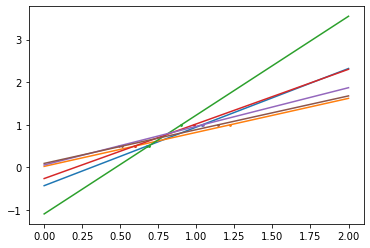

In [37]:
>>> X = np.c_[ .5, 1].T
>>> y = [.5, 1]
>>> test = np.c_[ 0, 2].T
>>> regr = linear_model.LinearRegression()

>>> import matplotlib.pyplot as plt
>>> plt.figure()

>>> np.random.seed(0)
>>> for _ in range(6):
...     this_X = .1 * np.random.normal(size=(2, 1)) + X
...     regr.fit(this_X, y)
...     plt.plot(test, regr.predict(test))
...     plt.scatter(this_X, y, s=3)

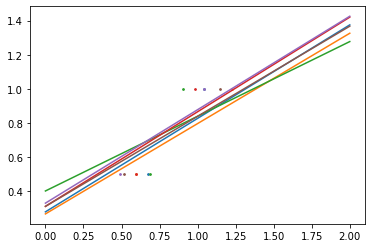

In [38]:
>>> regr = linear_model.Ridge(alpha=.1)

>>> plt.figure()

>>> np.random.seed(0)
>>> for _ in range(6):
...     this_X = .1 * np.random.normal(size=(2, 1)) + X
...     regr.fit(this_X, y)
...     plt.plot(test, regr.predict(test))
...     plt.scatter(this_X, y, s=3)

In [39]:
>>> alphas = np.logspace(-4, -1, 6)
>>> print([regr.set_params(alpha=alpha)
...            .fit(diabetes_X_train, diabetes_y_train)
...            .score(diabetes_X_test, diabetes_y_test)
...        for alpha in alphas])

[0.5851110683883534, 0.5852073015444677, 0.5854677540698493, 0.5855512036503916, 0.5830717085554163, 0.5705899943728011]


In [40]:
>>> regr = linear_model.Lasso()
>>> scores = [regr.set_params(alpha=alpha)
...               .fit(diabetes_X_train, diabetes_y_train)
...               .score(diabetes_X_test, diabetes_y_test)
...           for alpha in alphas]
>>> best_alpha = alphas[scores.index(max(scores))]
>>> regr.alpha = best_alpha
>>> regr.fit(diabetes_X_train, diabetes_y_train)

>>> print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [41]:
>>> log = linear_model.LogisticRegression(C=1e5)
>>> log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

In [42]:
>>> from sklearn import svm
>>> svc = svm.SVC(kernel='linear')
>>> svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

### Curse of Dimensionality

The curse of dimensionality refers to the issues that come from a datasets that contains a large number of features. Having a large number of features can lead to overfitting when training a model and poor results when performing clustering. However, we can address large dimensionality in the following models:

**k-Nearest-Neighbor**: With more dimensions, k-nearest-neighbors is going to require more data to perform accurately. Since this is not always possible, we can also employ dimensionality reduction techniques to reduce the complexity of our data.

**MaxEnt** Maximum Entropy is an approach to dimensionality reduction. Maximum Entropy Algorithms find low-dimensional representations of the data and identify the independent features within it.

**Naive Bayes** Naive bayes scales linearly in time complexity with the number of dimensions. This means it does not face the same dimensionality restraints that some of the other classifiers mentioned face.

**SVM** SVMs are well known for scaling well with high dimensional data. SVM models perform regularization on the data that naturally reduced the risk of overfitting.

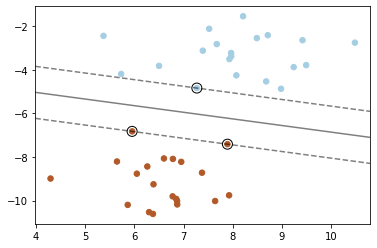

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
# first we import our packages

# Next we import a random sample of points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Apply the model and fit it to our random sample
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Plot the points from our sample
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# Plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### Maximum Margin Hyperplane

The maximum margin hyperplane is the seperator between classes that gives the maximum distance between the nearest observations. In the case above, our margin is set to be linear, and seperates two classes. The circled points are the nearest observations which are our support vectors

In [44]:
# Question 7
bc_df_headers = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape",
                 "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin",
                 "Normal Nucleoli","Mitoses","Class"]
bc_df = pd.read_csv("breast-cancer-wisconsin.data", header = None)
bc_df.columns = bc_df_headers
bc_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [45]:
print(bc_df.dtypes)
print(bc_df.shape)
print(bc_df.isna().sum())

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object
(699, 11)
Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [46]:
bc_df["Bare Nuclei"] = pd.to_numeric(bc_df["Bare Nuclei"], errors = "coerce")
print(bc_df.isna().sum())
bc_df.dropna(inplace = True)
bc_df.drop(["Sample code number"], axis = 1, inplace = True)
bc_df.head()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [47]:
bc_X = bc_df.drop(["Class"], axis = 1)
bc_Y = bc_df['Class']

scaler = StandardScaler().fit(bc_X)
bc_X = scaler.transform(bc_X)

bc_Y = bc_Y.replace(2, 0)
bc_Y = bc_Y.replace(4, 1)

0.07576780181929968


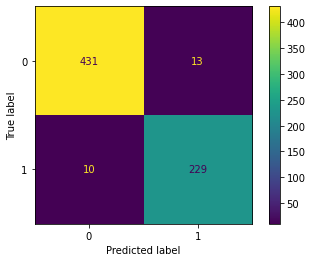

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

bc_Y = np.array(bc_Y)

kf = KFold(n_splits = 10)
hl = []
cf_matrix = [[0,0],[0,0]]

for train_index, test_index in kf.split(bc_X):
    X_train, X_test = bc_X[train_index], bc_X[test_index]
    y_train, y_test = bc_Y[train_index], bc_Y[test_index]
    
    clf = SVC(kernel = 'linear')
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    pred_func = clf.decision_function(X_test)
    
    hl.append(hinge_loss(y_test,pred_func))
    cf_matrix += (confusion_matrix(y_test,pred))
    
print(np.mean(hl))
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

### Hinge Loss Function

The hinge loss function us the cost function for SVC models. It goes beyond just understanding the classification and uses the decision function to calculate the distance from the decision line to calculate loss. The further from the decision line in the wrong direction, the higher the loss

0.10306165645280026


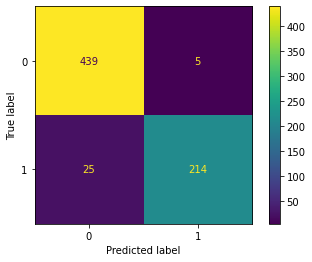

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

bc_Y = np.array(bc_Y)

kf = KFold(n_splits = 10)
hl = []
cf_matrix = [[0,0],[0,0]]

for train_index, test_index in kf.split(bc_X):
    X_train, X_test = bc_X[train_index], bc_X[test_index]
    y_train, y_test = bc_Y[train_index], bc_Y[test_index]
    
    clf = SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    pred_func = clf.decision_function(X_test)
    
    hl.append(hinge_loss(y_test,pred_func))
    cf_matrix += (confusion_matrix(y_test,pred))
    
print(np.mean(hl))
cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

Using linear and polynomial kernals, we get similar results for our loss function. However, if we look at our confusion matrix, we see that we miss a much larger number of true malignant cases with the polynomial function. Assuming we more critical of False Negatives than False Positives in this case, we would prefer the linear kernal

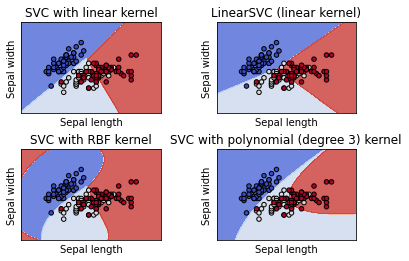

In [50]:
#Question 8 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# Import our packages

def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
# This function plots the grid for the datapoints in our sample

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
# This function plots the decision boundaries of the SVM classifier

# import the data and take first 2 features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# we create each model with different Kernals and fit them each to the data
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Finally we plot the grids, decision boundaries, and points
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Analyzing the results for each model:

**SVC (linear kernal)** we can see clearly that our boundaries for this model are linear, creating 3 infinite planes for our classes.

**LinearSVC** Also a linear model so our boundaries are still linear. Linear SVC is meant to work better with a large number of sample which might be why it appears to classifiy better

**SVC (RBF)** The RBF kernal allows our bounderies to be non linear and non infinate. For example, we see in the plot above that the blue class appears to be fully encompassed.

**SVC (Polynomial)** The polynomial kernal still has infinite planes, but allows for non-linear boundaries. In this case it appears be a poor classifier of the red classes, but the best classifier of the blue classes.

### What is the kernal trick

The kernal trick is the transformation of the feature vectors before optimizing our objective function. This reduced the complexity of our data and allows us to work with higher dimensions.

## Question 9

### Loss Functions

**SVM** : SVM uses the Hinge loss function for both linear and non-linear models. It works by calculation the distance from the classification boundaries of the incorrect classifications. The formula for hinge loss is:



where t is the intended output and y is the decision function

**Naive Bayes** We can measure the loss of Naive Bayes using F1_score, a zero to one scoring. The formula is:

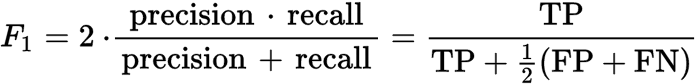

**Logistic Regression** The loss function for Logistic regression is called logistic loss, and punishes the model when an incorrect prediction is made. The formula is: 

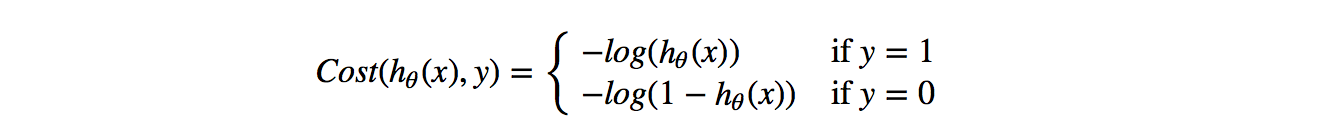

### Model Selection

**SVC** and **Logistic regression** are discriminative classifiers and are generally preferred. but **Naive Bayes** is prefered for smaller datasets